In [1]:
import at
import at.plot
import numpy as np
import matplotlib.pyplot as plt
from math import pi


In [2]:
E0 = 3e9 #Energy GeV
L0 = 5.78400128e2 #Circumference meter
C0 = 299792458 #speed of light m/s
HarmNum = 328

aper = at.Aperture('AP', [-0.05,0.05,-0.05,0.05])
# Markers
BPM     = at.Monitor('BPM');
GIRDER  = at.Marker('GIRDER');

CAV = at.RFCavity('CAV', 0, 500.00000e+06, HarmNum*C0/L0, HarmNum, energy=E0);
#quadrupoles
q1 = at.Quadrupole('q1',0.12, 6.498710)
q2  = at.Quadrupole('q2',0.12,-8.097841)
q3 = at.Quadrupole('q3',0.12, 5.344311)
q4 = at.Quadrupole('q4',0.15, 10.00000)
q5  = at.Quadrupole('q5',0.12, -6.590778)

print(q3, CAV, BPM,GIRDER )

Quadrupole:
	FamName : q3
	Length : 0.12
	PassMethod : StrMPoleSymplectic4Pass
	NumIntSteps : 10
	MaxOrder : 1
	PolynomA : [0. 0.]
	PolynomB : [0.       5.344311]
	K : 5.344311 RFCavity:
	FamName : CAV
	Length : 0.0
	PassMethod : RFCavityPass
	Voltage : 500000000.0
	Frequency : 170006750.45493767
	HarmNumber : 328
	Energy : 3000000000.0
	TimeLag : 0.0 Monitor:
	FamName : BPM
	Length : 0.0
	PassMethod : IdentityPass Marker:
	FamName : GIRDER
	Length : 0.0
	PassMethod : IdentityPass


In [3]:
#Drifts
long   =    at.Drift('long' ,2.52220);
db     =    at.Drift('db' ,0.120000);
d1     =    at.Drift('d1' ,0.130000);
d2     =    at.Drift('d2' ,0.110000);
d3     =    at.Drift('d3',0.110000);
d4     =    at.Drift('d4' ,0.100000);
d5     =    at.Drift('d5',0.351402);
d6     =    at.Drift('d6',0.150000);
d7     =    at.Drift('d7',0.150000);
d8     =    at.Drift('d8',0.150000);
d9     =    at.Drift('d9',0.150000);
d10    =    at.Drift('d10',0.120000);

print(d10)

Drift:
	FamName : d10
	Length : 0.12
	PassMethod : DriftPass


In [4]:
# Bending magnets
import math
rb     =  at.Dipole('rb'  , 0.200000, math.radians(-0.15000) , 4.850000,FullGap=0.05,FringeQuadEntrance =1);
bq     =  at.Dipole('bq'  , 0.200000, math.radians(0.200000) , -4.850000,FringeQuadEntrance = 1);
bc     =  at.Dipole('bc'  , 1.200000, math.radians(2.612000) , 0.421000);
bmat   =  at.Dipole('bmat', 0.800000, math.radians(1.758000) , -0.522199); 

print(bq.Length/bq.BendingAngle)

57.29577951308232


In [5]:
#Sextupoles
s1     =    at.Sextupole('s1' , 0.120000 , 0)#193.070008);
s2     =    at.Sextupole('s2' , 0.150000 ,0)#-202.3659913);
s3     =    at.Sextupole('s3' , 0.120000 ,0)#18.333333);
s4     =    at.Sextupole('s4' , 0.150000 ,0)#-29.333333);
s5     =    at.Sextupole('s5' , 0.150000 ,0.000000 );

In [6]:
bend   =   [ bq, db, bc, db, bq];
Lcell  =  [s1 ,d1, rb, d2, BPM , s2, d3, bend, d3,s2, BPM, d2, rb, d1, s1];
imatch =   [ bmat, d5, s4, d5, q1, d4, s3];
rimatch=   [ s3, d4, q1, d5, s4, d5, bmat];
fmatch =   [ long, BPM, s5, d10, q5, d9, q4, d8, q3, d7, q2, d6];
rfmatch=   [ d6, q2, d7, q3, d8, q4, d9, q5, d10, s5, BPM, long];
match  =   [ fmatch ,imatch];
rmatch =   [ rimatch ,rfmatch];
seven  =   [Lcell, Lcell, Lcell, Lcell, Lcell, Lcell, Lcell ];
mba    =   at.Lattice( [GIRDER, long, BPM, s5, d10, q5, d9, q4, d8, q3, d7, q2, d6,
                        bmat, d5, s4, d5, q1, d4, s3, GIRDER, GIRDER,
                        s1 ,d1, rb, d2, BPM , s2, d3,  bq, db, bc, db, bq, d3,s2, BPM, d2, rb, d1, s1,
                        s1 ,d1, rb, d2, BPM , s2, d3,  bq, db, bc, db, bq, d3,s2, BPM, d2, rb, d1, s1,
                        s1 ,d1, rb, d2, BPM , s2, d3,  bq, db, bc, db, bq, d3,s2, BPM, d2, rb, d1, s1,
                        s1 ,d1, rb, d2, BPM , s2, d3,  bq, db, bc, db, bq, d3,s2, BPM, d2, rb, d1, s1,
                        s1 ,d1, rb, d2, BPM , s2, d3,  bq, db, bc, db, bq, d3,s2, BPM, d2, rb, d1, s1,
                        s1 ,d1, rb, d2, BPM , s2, d3,  bq, db, bc, db, bq, d3,s2, BPM, d2, rb, d1, s1,
                        s1 ,d1, rb, d2, BPM , s2, d3,  bq, db, bc, db, bq, d3,s2, BPM, d2, rb, d1, s1 ,
                        GIRDER, GIRDER, s3, d4, q1, d5, s4, d5, bmat ,
                        d6, q2, d7, q3, d8, q4, d9, q5, d10, s5, BPM, long, GIRDER],name='MBA lattice',
                      energy=E0, beam_current =0.22,periodicity=16);

SR = at.Lattice(mba*16)
print(mba[1]),len(SR)

Drift:
	FamName : long
	Length : 2.5222
	PassMethod : DriftPass


(None, 2832)

Dipole:
	FamName : rb
	Length : 0.2
	PassMethod : BndMPoleSymplectic4Pass
	FullGap : 0.05
	FringeQuadEntrance : 1
	BendingAngle : -0.002617993877991494
	EntranceAngle : 0.0
	ExitAngle : 0.0
	NumIntSteps : 10
	MaxOrder : 1
	PolynomA : [0. 0.]
	PolynomB : [0.   4.85]
	K : 4.85


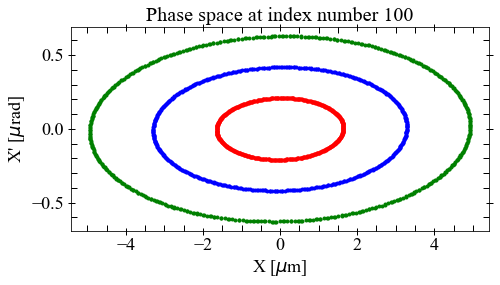

In [7]:
nturns=500
ref=10

def lat_pas(nturns, ref, save = False):
    plt.rcParams["figure.figsize"] = [2*3.75, 3.75]
    plt.rcParams['xtick.major.size'] = 5
    plt.rcParams['xtick.labelsize'] = 18
    plt.rcParams['ytick.labelsize'] = 18
    plt.rcParams['xtick.top'] = True
    plt.rcParams['ytick.right'] = True
    plt.rcParams['axes.titlesize'] = 20
    plt.rcParams['legend.loc'] ='upper right'
    font = {'family':'Times New Roman',
       'weight' : 'normal',
       'size' : 18 }
    plt.rc('font',**font)
    plt.rcParams['lines.linewidth'] = 2
    Z01 = np.array([1e-6, 0, 0, 0, 0, 0])
    Z02 = np.array([2.0e-6, 0, 0, 0, 0, 0])
    Z03 = np.array([3e-6, 0, 0, 0, 0, 0])
    Z1=at.lattice_pass(SR, Z01, nturns, refpts=ref)
    Z2=at.lattice_pass(SR, Z02, nturns, refpts=ref)
    Z3=at.lattice_pass(SR, Z03, nturns, refpts=ref)
    plt.figure()
    plt.plot(Z1[0, 0, 0, :]*1e6, Z1[1, 0, 0, :]*1e6,'r.')
    plt.plot(Z2[0, 0, 0, :]*1e6, Z2[1, 0, 0, :]*1e6,'b.')
    plt.plot(Z3[0, 0, 0, :]*1e6, Z3[1, 0, 0, :]*1e6,'g.')
    plt.title("Phase space at index number %g" %ref)
    plt.minorticks_on()
    plt.tick_params(axis='both',which='minor',width=1, length=6, top='True', right='True', direction='in')
    plt.tick_params(which='both', width=1)
    plt.tick_params(which='major', length=7, top='True', right='True', direction='inout')
    plt.tick_params(axis='both',which='minor',width=1, length=6, top='True', right='True', direction='in')
# Create the contour plot
    plt.ylabel("X' [$\mu$rad]")
    plt.xlabel("X [$\mu$m]")
    print(mba[ref])
    if save == True:
        plt.savefig('PhaseSpace_%g'%ref+'.png', dpi = 600,bbox_inches=None, pad_inches=0.5)
    plt.show()
    
nturns = 500
ref = 100
lat_pas(nturns, ref, save = False)    

Dipole:
	FamName : bq
	Length : 0.2
	PassMethod : BndMPoleSymplectic4Pass
	FringeQuadEntrance : 1
	BendingAngle : 0.003490658503988659
	EntranceAngle : 0.0
	ExitAngle : 0.0
	NumIntSteps : 10
	MaxOrder : 1
	PolynomA : [0. 0.]
	PolynomB : [ 0.   -4.85]
	K : -4.85


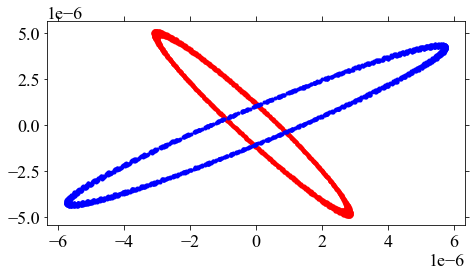

In [58]:
nturns=1500
ref =29
Z01 = np.array([1e-6, 1e-6, 1e-6, 1e-6, 0.0, 0])
Z1=at.lattice_pass(SR,Z01,nturns, refpts=ref)
plt.plot(Z1[0, 0, 0, :], Z1[1, 0, 0, :], 'r.')
plt.plot(Z1[2, 0, 0, :], Z1[3, 0, 0, :], 'b.')
print(mba[ref])

In [55]:
[elemdata0, beamdata, elemdata] = at.get_optics(SR, get_chrom=True)
print(beamdata.tune)
print(beamdata.chromaticity)

[0.23712535 0.19396347]
[2.53285944 0.96367382]


In [14]:
refqf = at.get_cells(SR, 'FamName', 'QF')   # FamName attribute == QF
#print(list(mba[refqf]))
refqd = at.get_cells(SR, 'FamName', 'QD')   # FamName attribute == QD
#print(list(mba[refqd]))
refbends = at.get_cells(SR, 'BendingAngle') # Existing BendingAngle attribute
#print(list(mba[refbends]))

In [15]:
refq1 = at.get_cells(SR, at.checktype(at.Quadrupole))   # class == Quadrupole
#print(list(SR[refq1]))
refq2 = at.get_cells(SR, at.checkname('q[12345]'))         # name matches a pattern
#print(list(SR[refq2]))
refbends = at.get_cells(SR, 'BendingAngle') # Existing BendingAngle attribute
#print(list(mba[refbends]))

In [16]:
for elem in mba.select(refqf | refqd):
    print(elem)

In [17]:
m44, _ = at.find_m44(mba,0)
print(m44)

[[ 0.88776316  1.33887394  0.          0.        ]
 [-0.15824983  0.88776316  0.          0.        ]
 [ 0.          0.         -0.45881526  5.27285536]
 [ 0.          0.         -0.14972695 -0.45881526]]


#energy loss 125.8 keV
88.5*3**4/57

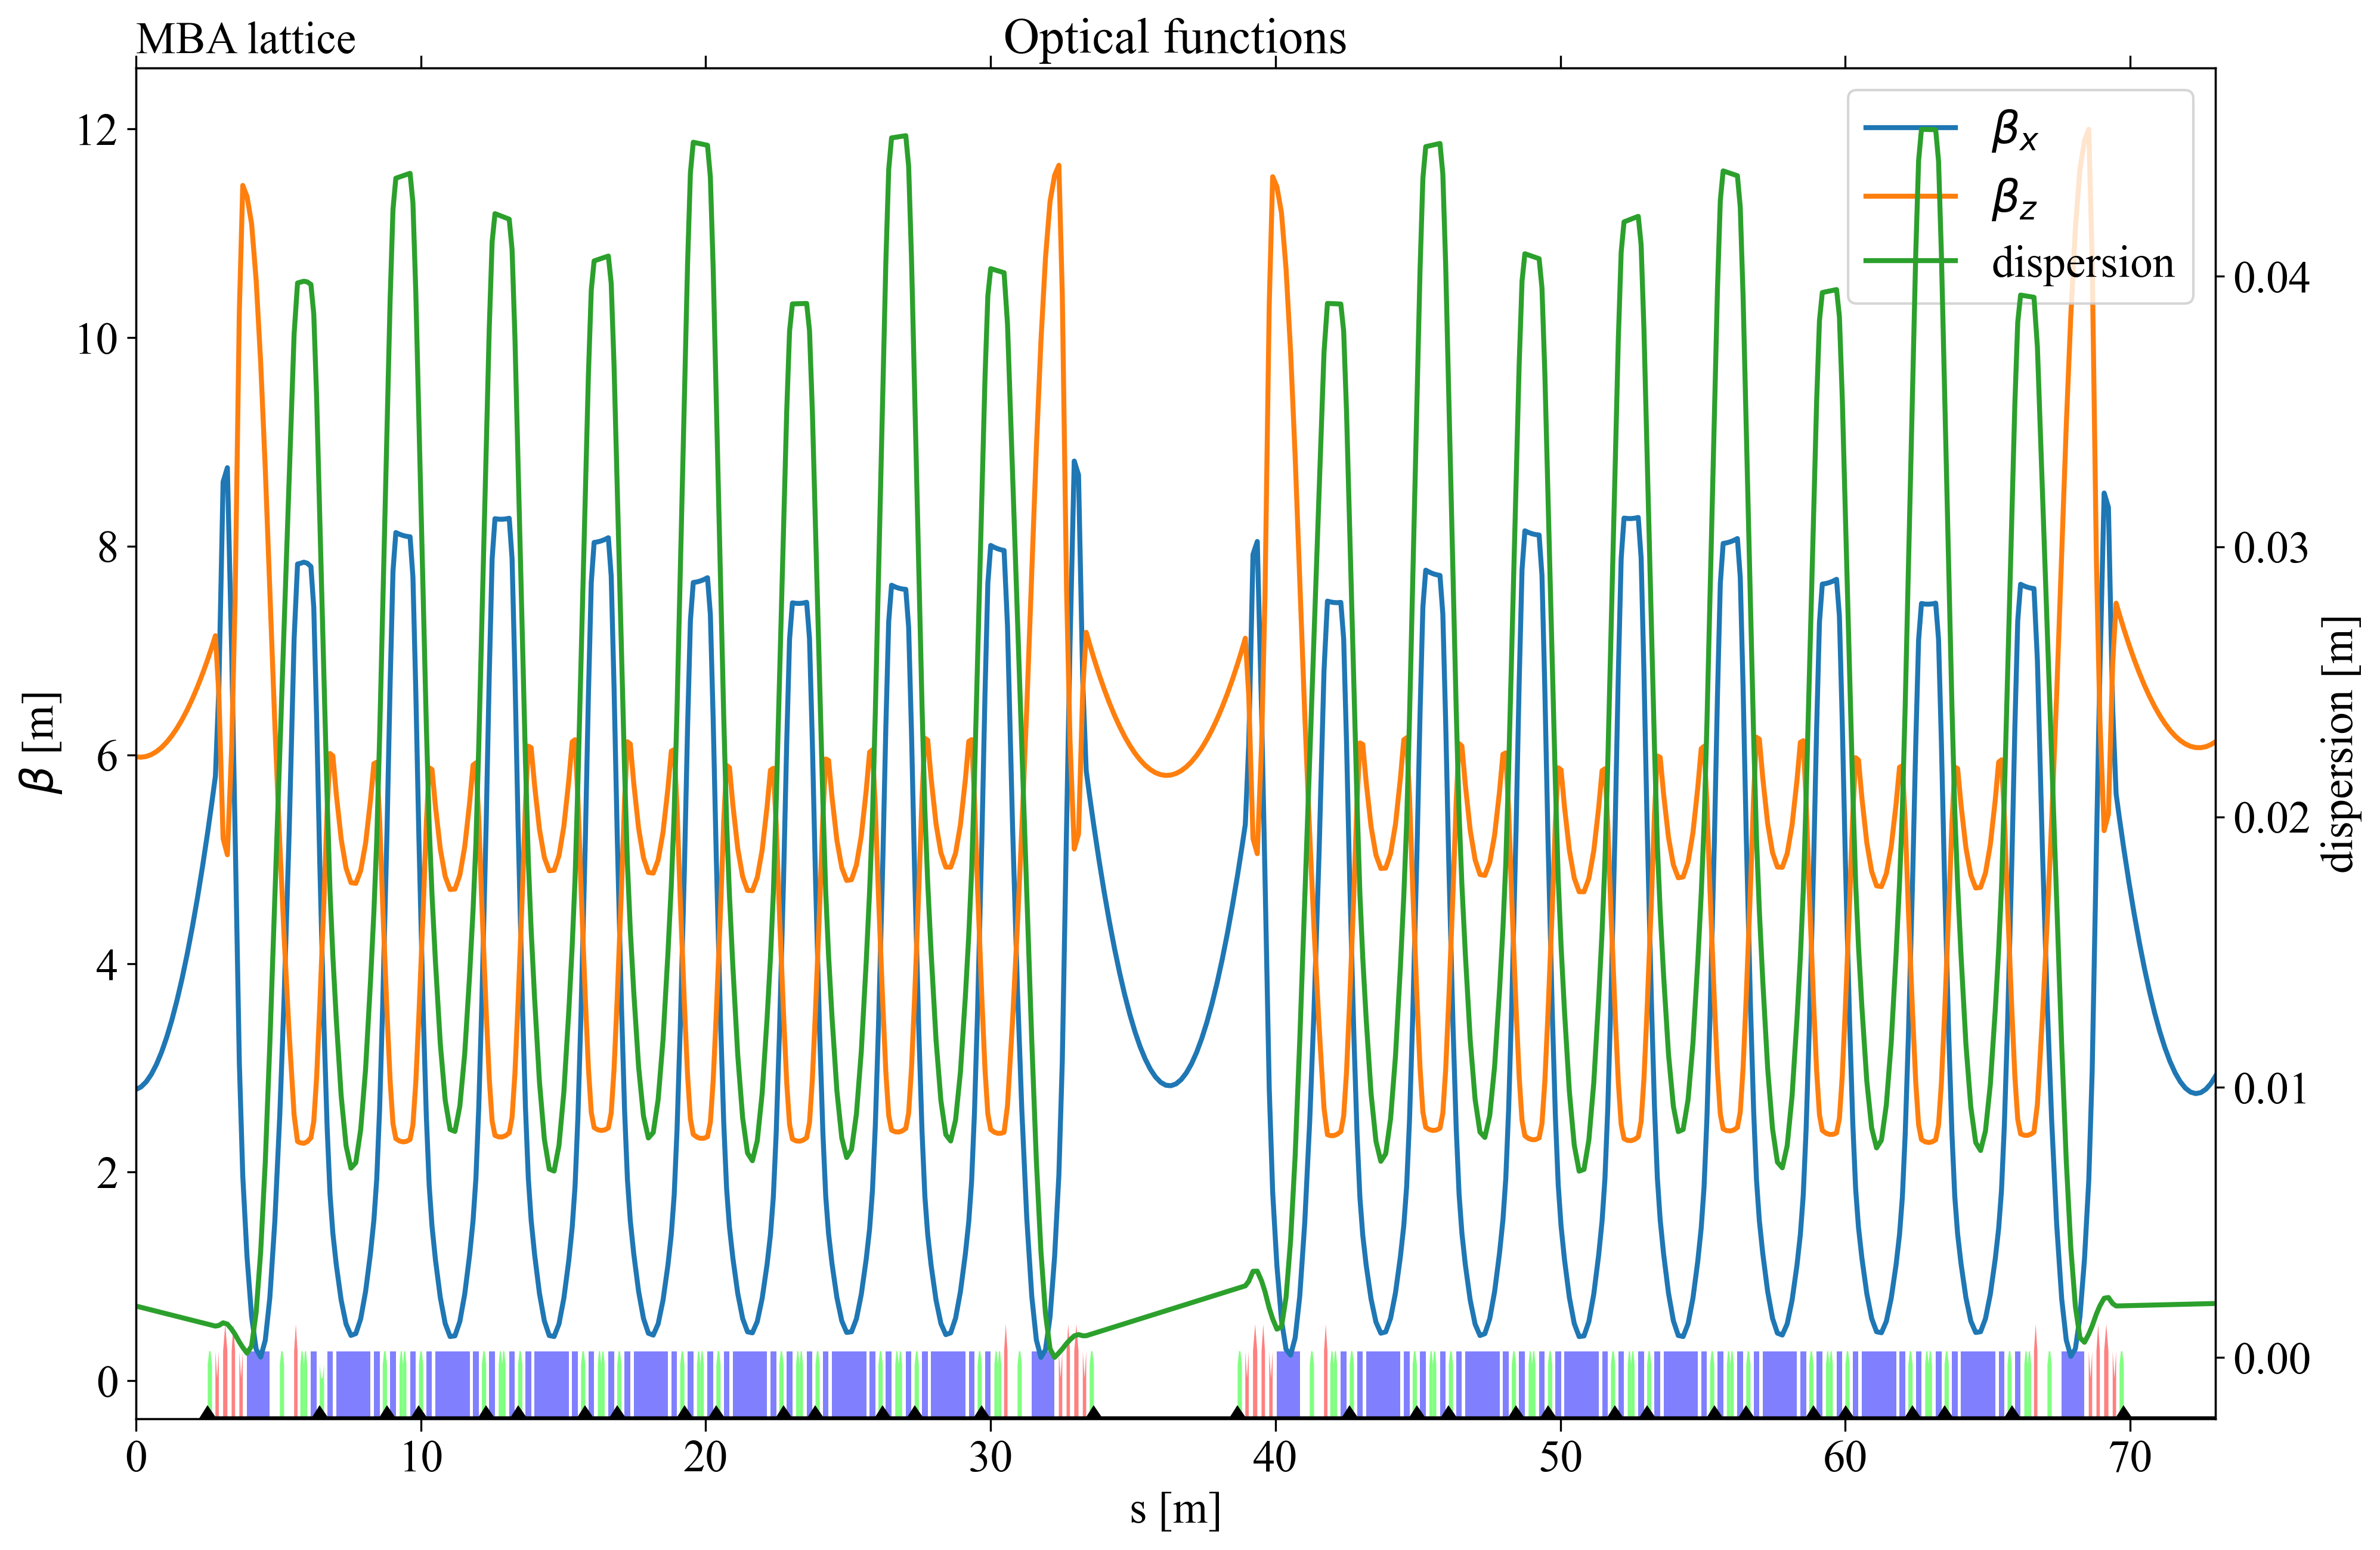

<Figure size 4500x3000 with 0 Axes>

In [98]:
plt.rcParams["figure.figsize"] = [15.0, 10.0]
plt.rcParams["figure.dpi"] = 300
at.plot.plot_beta(SR, s_range=[0,73], dp=0.00001 )
betx= 1
disx= 0.01
dp = 0.00001
bety = 5
sig_x = np.sqrt(betx*2.96242365e-11 + (disx*dp)**2)
sig_y = np.sqrt(bety*2.96242365e-11*0.01)
sig_y
plt.savefig('mba_lat.eps', dpi=300)
plt.savefig('mba_lat.png', dpi=600)


RFC = at.RFCavity('RFC', 0.00, 1e6, 500e6, 100, 3.0E9, PassMethod='IdentityPass')
mba.insert(0, RFC)
#FODOSext.harmonic_number=100
print(RFC)

In [57]:
at.fit_tune(SR, refq1, refq2, [0.20, 0.28])


Fitting Tune...
Initial value [0.21909545 0.21273863]
iter# 0 Res. 0.0069839618307364175
iter# 1 Res. 0.006985542793836726
iter# 2 Res. 0.006985542793836726
Final value [0.22957811 0.20182917] 



In [23]:
refs1 = at.get_cells(SR, at.checktype(at.Sextupole))   # class == Quadrupole
#print(list(mba[refs1]))
refs2 = at.get_cells(SR, at.checkname('s[24]'))         # name matches a pattern
#print(list(mba[refs2]))

In [42]:
refsext = at.get_cells(SR, at.checktype(at.Sextupole)) # Select all sextpoles
refsf,refsd = np.flatnonzero(refsext)[3:5]                    # Take the 1st ones

at.fit_chrom(SR, refsf, refsd, [0.3, 0.5])


Fitting Chromaticity...
Initial value [-7.71428493 -0.85160713]
iter# 0 Res. 0.0036392930100973583
iter# 1 Res. 2.3411600210552425e-07
iter# 2 Res. 1.372306098938638e-11
Final value [0.29999894 0.49999645] 



In [37]:
[elemdata0, beamdata, elemdata] = at.get_optics(SR, get_chrom=True)
print(beamdata.tune)
print(beamdata.chromaticity)

[0.14457353 0.2897569 ]
[0.35000593 0.90002157]


In [59]:
print(SR[refsext])

Lattice(<544 elements>, name='MBA lattice', energy=3000000000.0, particle=Particle('relativistic'), periodicity=1, beam_current=0.22, nbunch=1)


In [64]:
RFC = at.RFCavity('RFC', 0.0, 128e3, 0.0, 100, 3.0E9, PassMethod='IdentityPass')
#SR.insert(0, RFC)
SR.harmonic_number=228
SR.set_cavity(Voltage=128.0e5, Frequency=at.Frf.NOMINAL)
print(SR[0], RFC)

RFCavity:
	FamName : RFC
	Length : 0.0
	PassMethod : IdentityPass
	Voltage : 12800000.0
	Frequency : 118175424.09672467
	HarmNumber : 100
	Energy : 3000000000.0
	TimeLag : 0.0 RFCavity:
	FamName : RFC
	Length : 0.0
	PassMethod : IdentityPass
	Voltage : 12800000.0
	Frequency : 118175424.09672467
	HarmNumber : 100
	Energy : 3000000000.0
	TimeLag : 0.0


In [68]:
print(at.radiation_parameters(SR))

  Frac. tunes (6D motion): [0.2362648  0.20436105 0.00343028]
                    Tunes: [6.52362648e+01 2.12043610e+01 3.43027746e-03]
           Chromaticities: [ 1.09721787 -0.67834202  0.018829  ]
 Momentum compact. factor: 7.601625e-05
              Slip factor: -7.598724e-05
                   Energy: 3.000000e+09 eV
       Energy loss / turn: 2.884723e+05 eV
 Radiation integrals - I1: 0.04396780899314801 m
                       I2: 0.2529522748218216 m^-1
                       I3: 0.009151946455015426 m^-2
                       I4: -0.3379342994639829 m^-1
                       I5: 1.3253489798677744e-06 m^-1
          Mode emittances: [2.96242365e-11            nan 1.46775741e-06]
Damping partition numbers: [2.33596071 1.         0.66403929]
            Damping times: [0.01717866 0.04012867 0.06043117] s
            Energy spread: 0.000848303
             Bunch length: 0.00173023 m
         Cavities voltage: 12800000.0 V
        Synchrotron phase: 3.11905 rd
    Synchrotron

In [66]:
SR.radiation_on()
_, beamdata, _ = at.ohmi_envelope(SR)
print(beamdata)


([0.2362648 , 0.20436105, 0.00343028], [1.12315263e-04, 4.81253691e-05, 3.19255642e-05], [[[ 2.80922420e+00,  3.10940006e-02, -7.18902791e-18, -1.90337376e-19,  5.61096894e-06, -6.86541594e-04], [ 3.10940037e-02,  3.56314335e-01,  3.95801311e-19, -4.35381753e-19, -4.36097144e-06, -5.78557031e-04], [-2.80464326e-21, -8.61383533e-23,  7.10372931e-39,  2.57086859e-40, -4.91724037e-27,  7.73791730e-25], [ 1.37338787e-22,  4.21805410e-24, -3.47857991e-40, -1.25891225e-41,  2.40789208e-28, -3.78913138e-26], [ 5.40815015e-06, -6.26364162e-06, -2.22844817e-23,  7.33032914e-24,  8.93740295e-11,  8.82088623e-09], [-6.86832086e-04, -5.78587012e-04,  9.95147514e-22,  7.41519517e-22,  5.72288674e-09,  1.08368425e-06]], [[ 1.10005133e-38, -8.40018992e-54,  7.43601365e-18,  1.72220185e-19,  4.44245115e-36, -2.22793132e-34], [ 8.53010802e-39, -4.06251220e-54, -4.06660675e-19,  4.35814097e-19,  3.44480180e-36, -1.72760072e-34], [ 5.56317088e-21, -5.12777087e-36,  5.97565072e+00, -2.13755380e-02,  2.246

In [67]:
print(at.envelope_parameters(SR))

  Frac. tunes (6D motion): [0.2362648  0.20436105 0.00343028]
                   Energy: 3.000000e+09 eV
       Energy loss / turn: 2.884723e+05 eV
          Mode emittances: [2.96190268e-11 1.06102869e-37 1.46804225e-06]
Damping partition numbers: [2.33544698 1.00070324 0.66384978]
            Damping times: [0.01717785 0.04008977 0.0604323 ] s
            Energy spread: 0.000848327
             Bunch length: 0.00173061 m
         Cavities voltage: 12800000.0 V
        Synchrotron phase: 3.11905 rd
    Synchrotron frequency: 1777.96 Hz
